## <center>Dakshay Ahuja - 2010990178

# Part 1- Supervised Learning

## Q1)EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
bank_data = pd.read_csv("Datasets/bank.csv", sep=";")
bank_data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank_data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [5]:
bank_data.isna().sum().any()

False

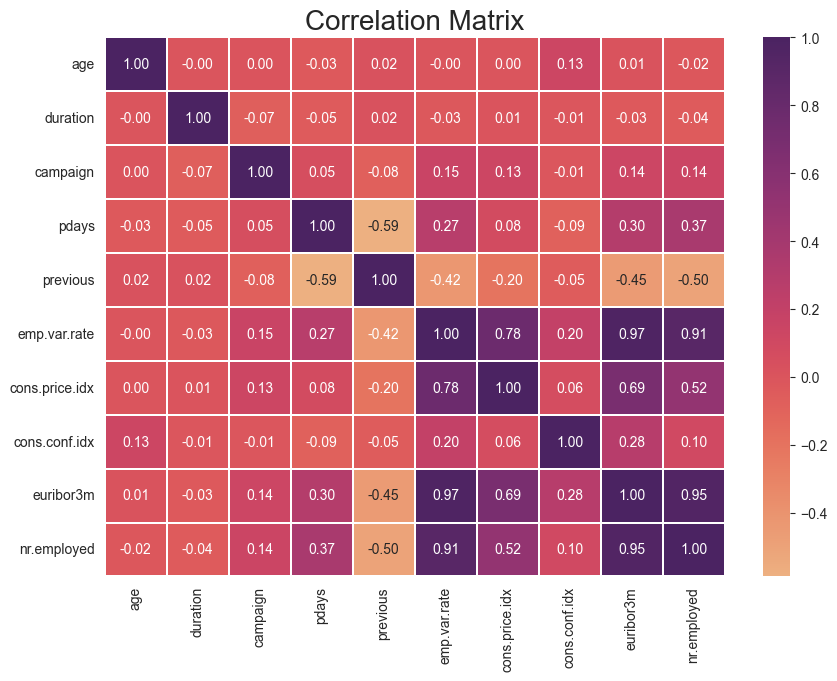

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(bank_data.select_dtypes(exclude=['object']).corr(), linewidths=0.2, annot=True, fmt='.2f', cmap='flare')
plt.title("Correlation Matrix", fontsize=20)
plt.show()

Highest Correlation is in betweeen ``euribor 3 month rate`` and ``employment variation rate``

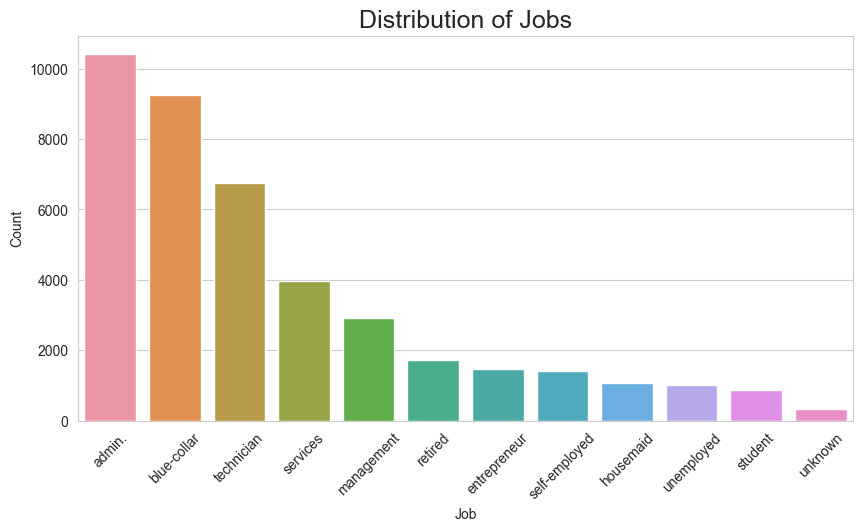

In [7]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 45)
job_count = bank_data['job'].value_counts()
sns.barplot(data=bank_data, x=job_count.index, y=job_count.values)
plt.title("Distribution of Jobs", fontsize=18)
plt.xlabel("Job")
plt.ylabel("Count")
plt.show()

We can observe that ``admin`` and ``bluecollar`` are the most popular jobs.

## Q2) Pre-Processing

#### Missing Value Analysis

In [8]:
bank_data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Label Encoding

In [9]:
le = LabelEncoder()
for col in bank_data.select_dtypes(include=['object']).columns:
 bank_data[col] = le.fit_transform(bank_data[col])
 
bank_data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

In [10]:
x = bank_data.iloc[:,:-1]
y = bank_data.iloc[:,-1]

#### Selecting important features based on Random Forest

In [11]:
regr = RandomForestClassifier(random_state=0)
regr.fit(x,y)

RandomForestClassifier(random_state=0)

[0.09292229 0.04853943 0.02430097 0.04397167 0.0089484  0.01974093
 0.01461915 0.00961456 0.01780743 0.04039627 0.32150086 0.04266178
 0.03105977 0.01220809 0.02415972 0.01619528 0.02050237 0.02346571
 0.12332706 0.06405828]


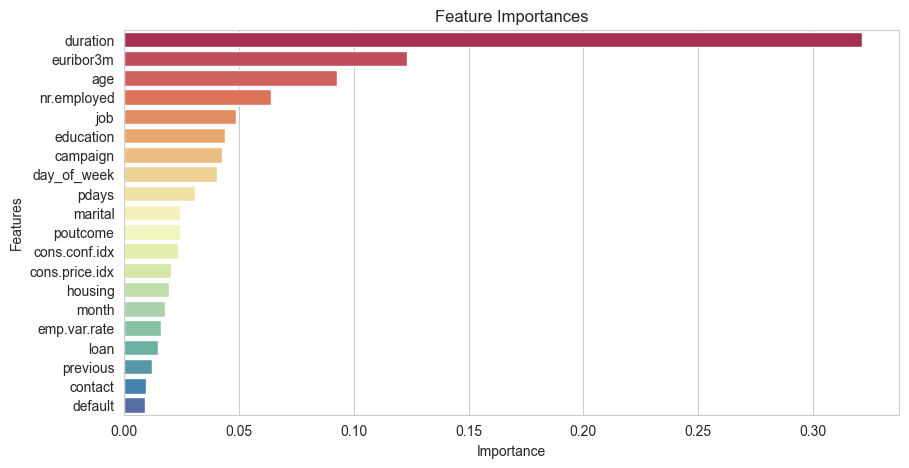

In [12]:
print(regr.feature_importances_)
sorted_idx=regr.feature_importances_.argsort()[::-1]
plt.figure(figsize=(10,5))
y_values = list(x.columns[sorted_idx])
sns.barplot(x=regr.feature_importances_[sorted_idx], y=y_values, palette="Spectral")
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### Handling unbalanced data using SMOTE

In [13]:
sm = SMOTE(random_state=0)
x,y = sm.fit_resample(x,y)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

#### Standardizing the data

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Q3,4) Building models and tabulating performance metrics

### Logistic Regression

In [16]:
classifier = LogisticRegression(random_state = 0, max_iter=10000)
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [17]:
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[6336  866]
 [ 793 6625]]


In [18]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy score is {}%".format(round(acc,2)))

Accuracy score is 88.65%


In [19]:
cv_acc = np.mean(cross_val_score(LogisticRegression(), x, y, cv=10)) * 100

In [20]:
print("Cross Validation Score is {}%".format(round(cv_acc,2)))

Cross Validation Score is 83.16%


### Decision Tree

In [21]:
dtree = DecisionTreeClassifier(random_state=20)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=20)

In [22]:
y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[6637  565]
 [ 517 6901]]


In [23]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {}%".format(round(acc,2)))

Accuracy: 92.6%


### Random Forest

In [24]:
regr = RandomForestClassifier(max_features=7, max_depth=8, n_jobs=-1)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [25]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy is {}%".format(round(acc,2)))
print("Mean Squared Error is {}%".format(round(mean_squared_error(y_test, y_pred),2)))

Accuracy is 91.98%
Mean Squared Error is 0.08%


### Performance Metrics

| Model               | Accuracy |
|---------------------|----------|
| Logistic Regression | 83.16%   |
| Decision Tree       | 92.52%   |
| Random Forest       | 92.02%   |


From above table we can see that Decision Tree and Random Forest have almost same accuracy. <br>
Keeping the model complexity in mind, we should choose Decision Tree.

# Part 2- Unsupervised Learning

## Q1,2)EDA

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings("ignore")

In [27]:
data = pd.read_csv("Datasets/credit_card.csv")
data = data.iloc[:,1:]
data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322               NaN          0.000000       6  
8947    81

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [29]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## Missing Value Analysis

In [30]:
data.isna().sum().any()

True

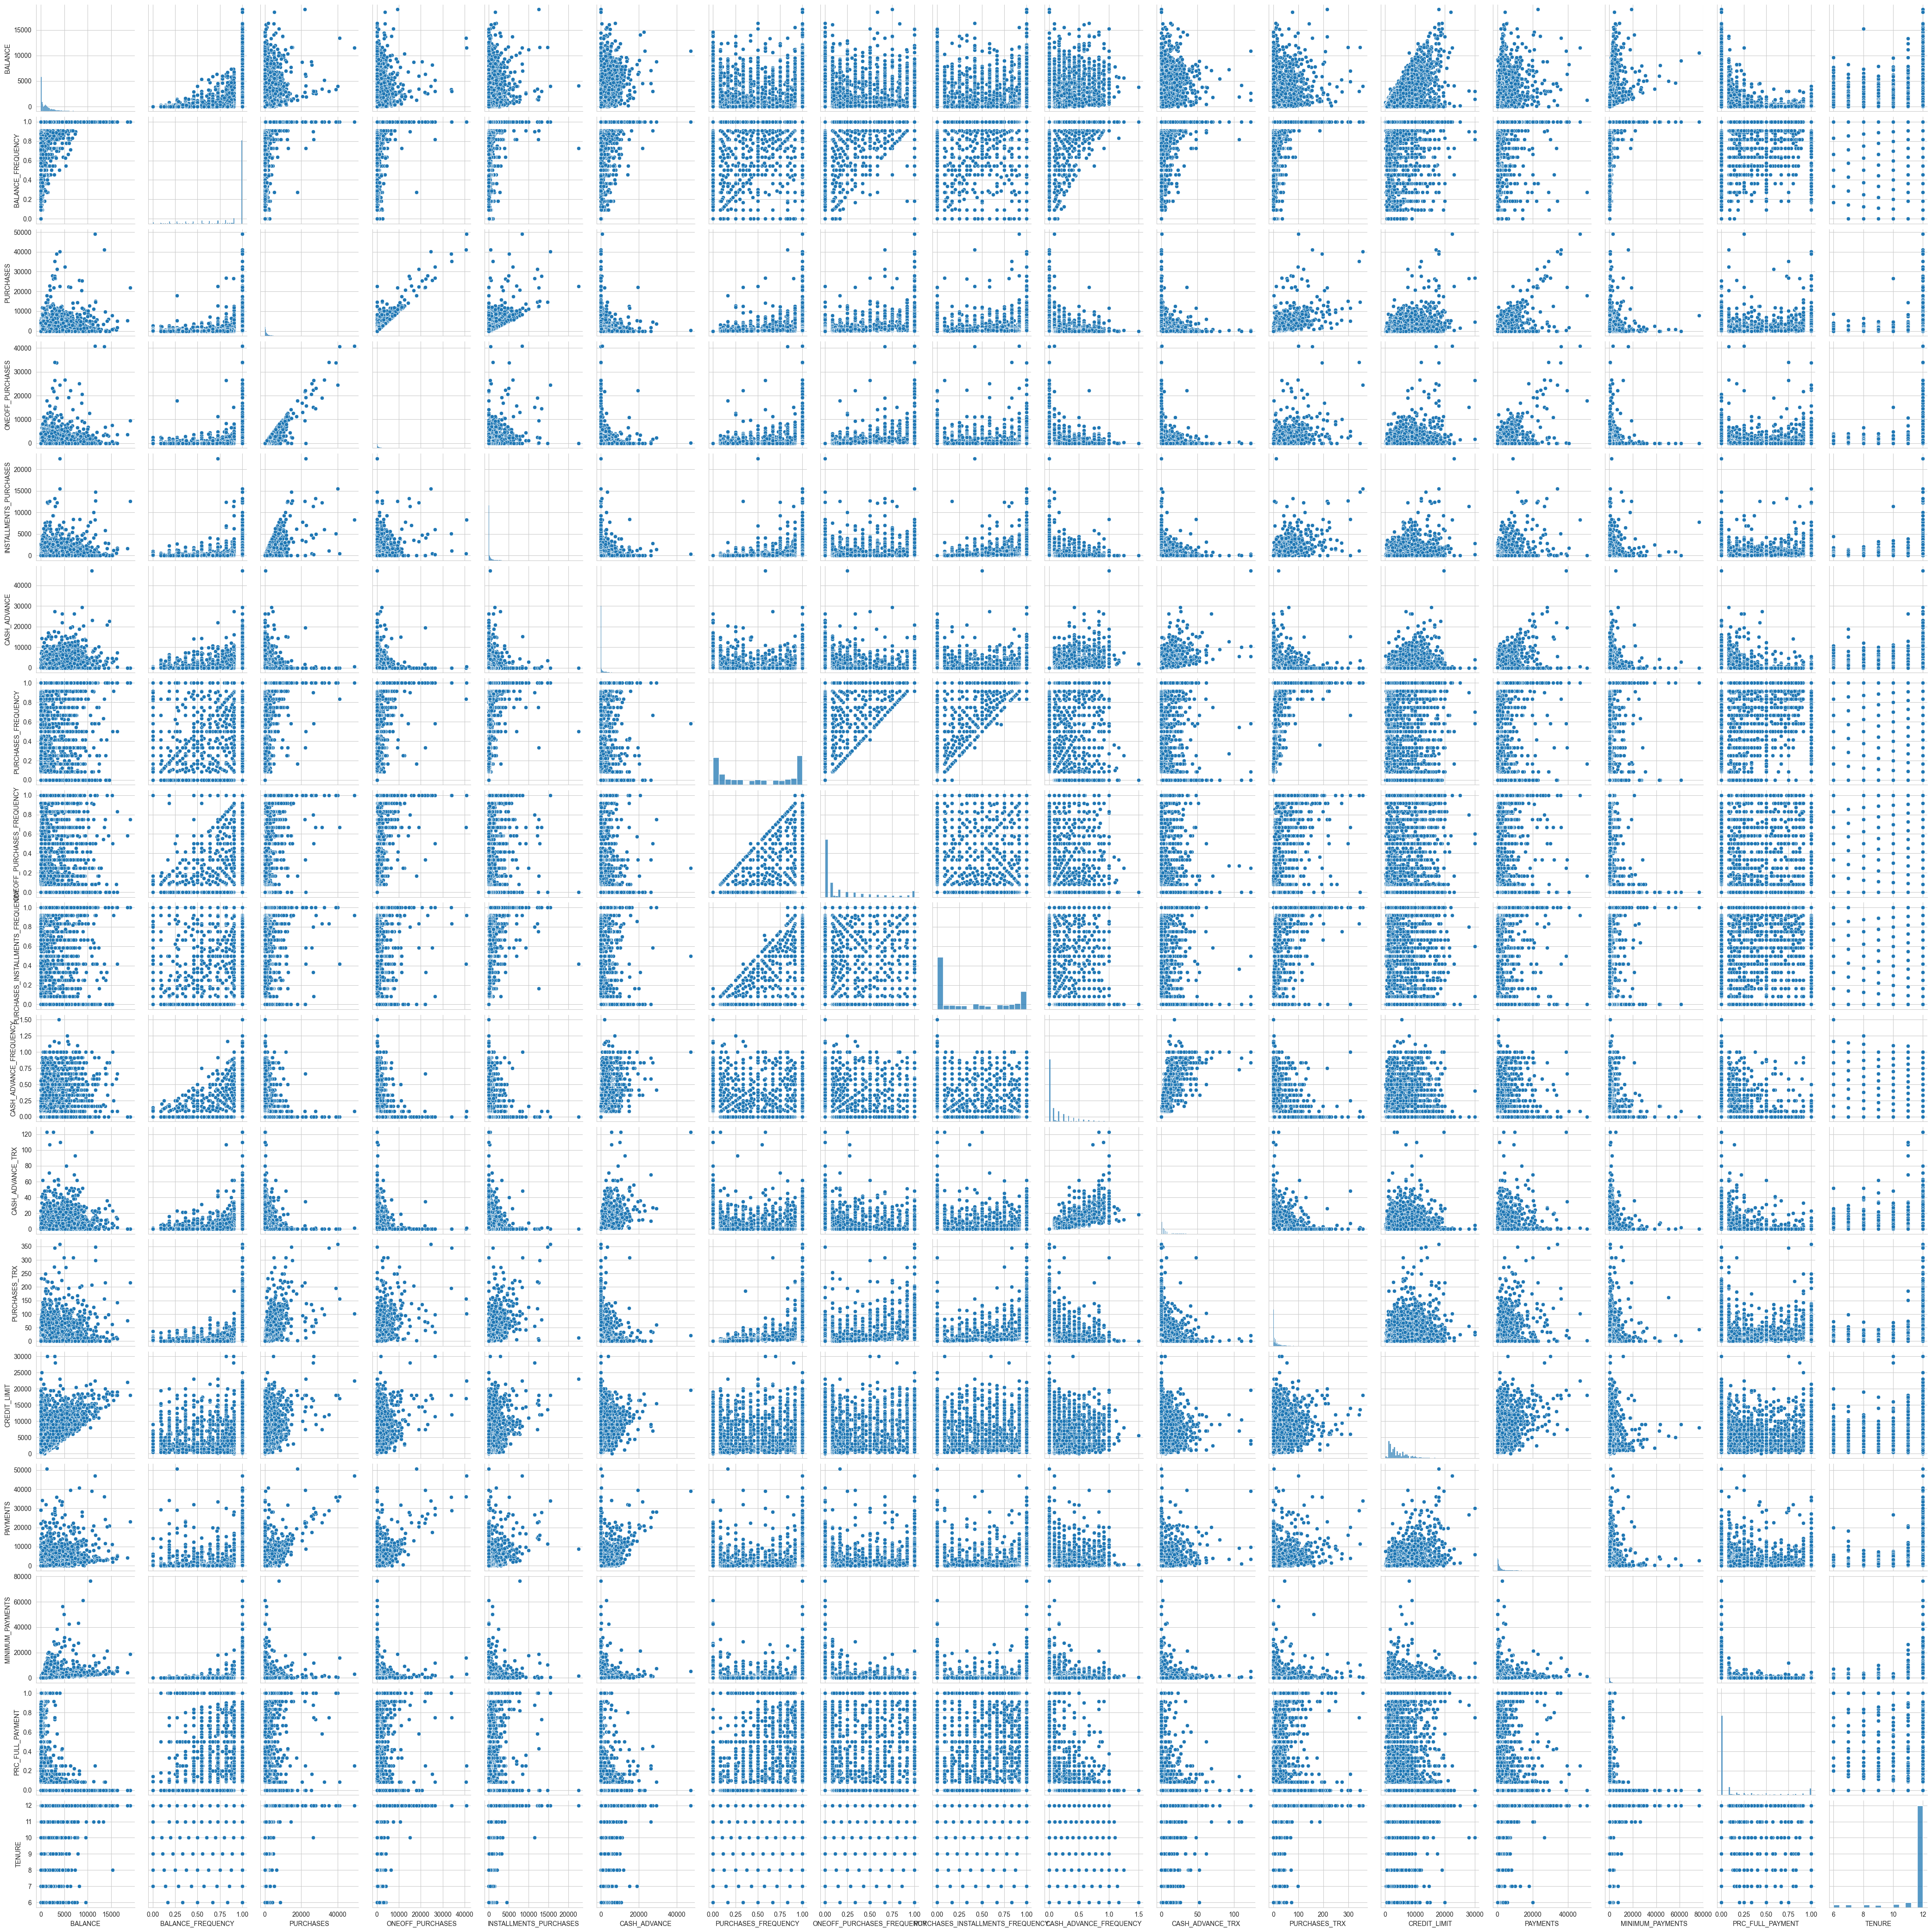

In [31]:
sns.pairplot(data=data)
plt.show()

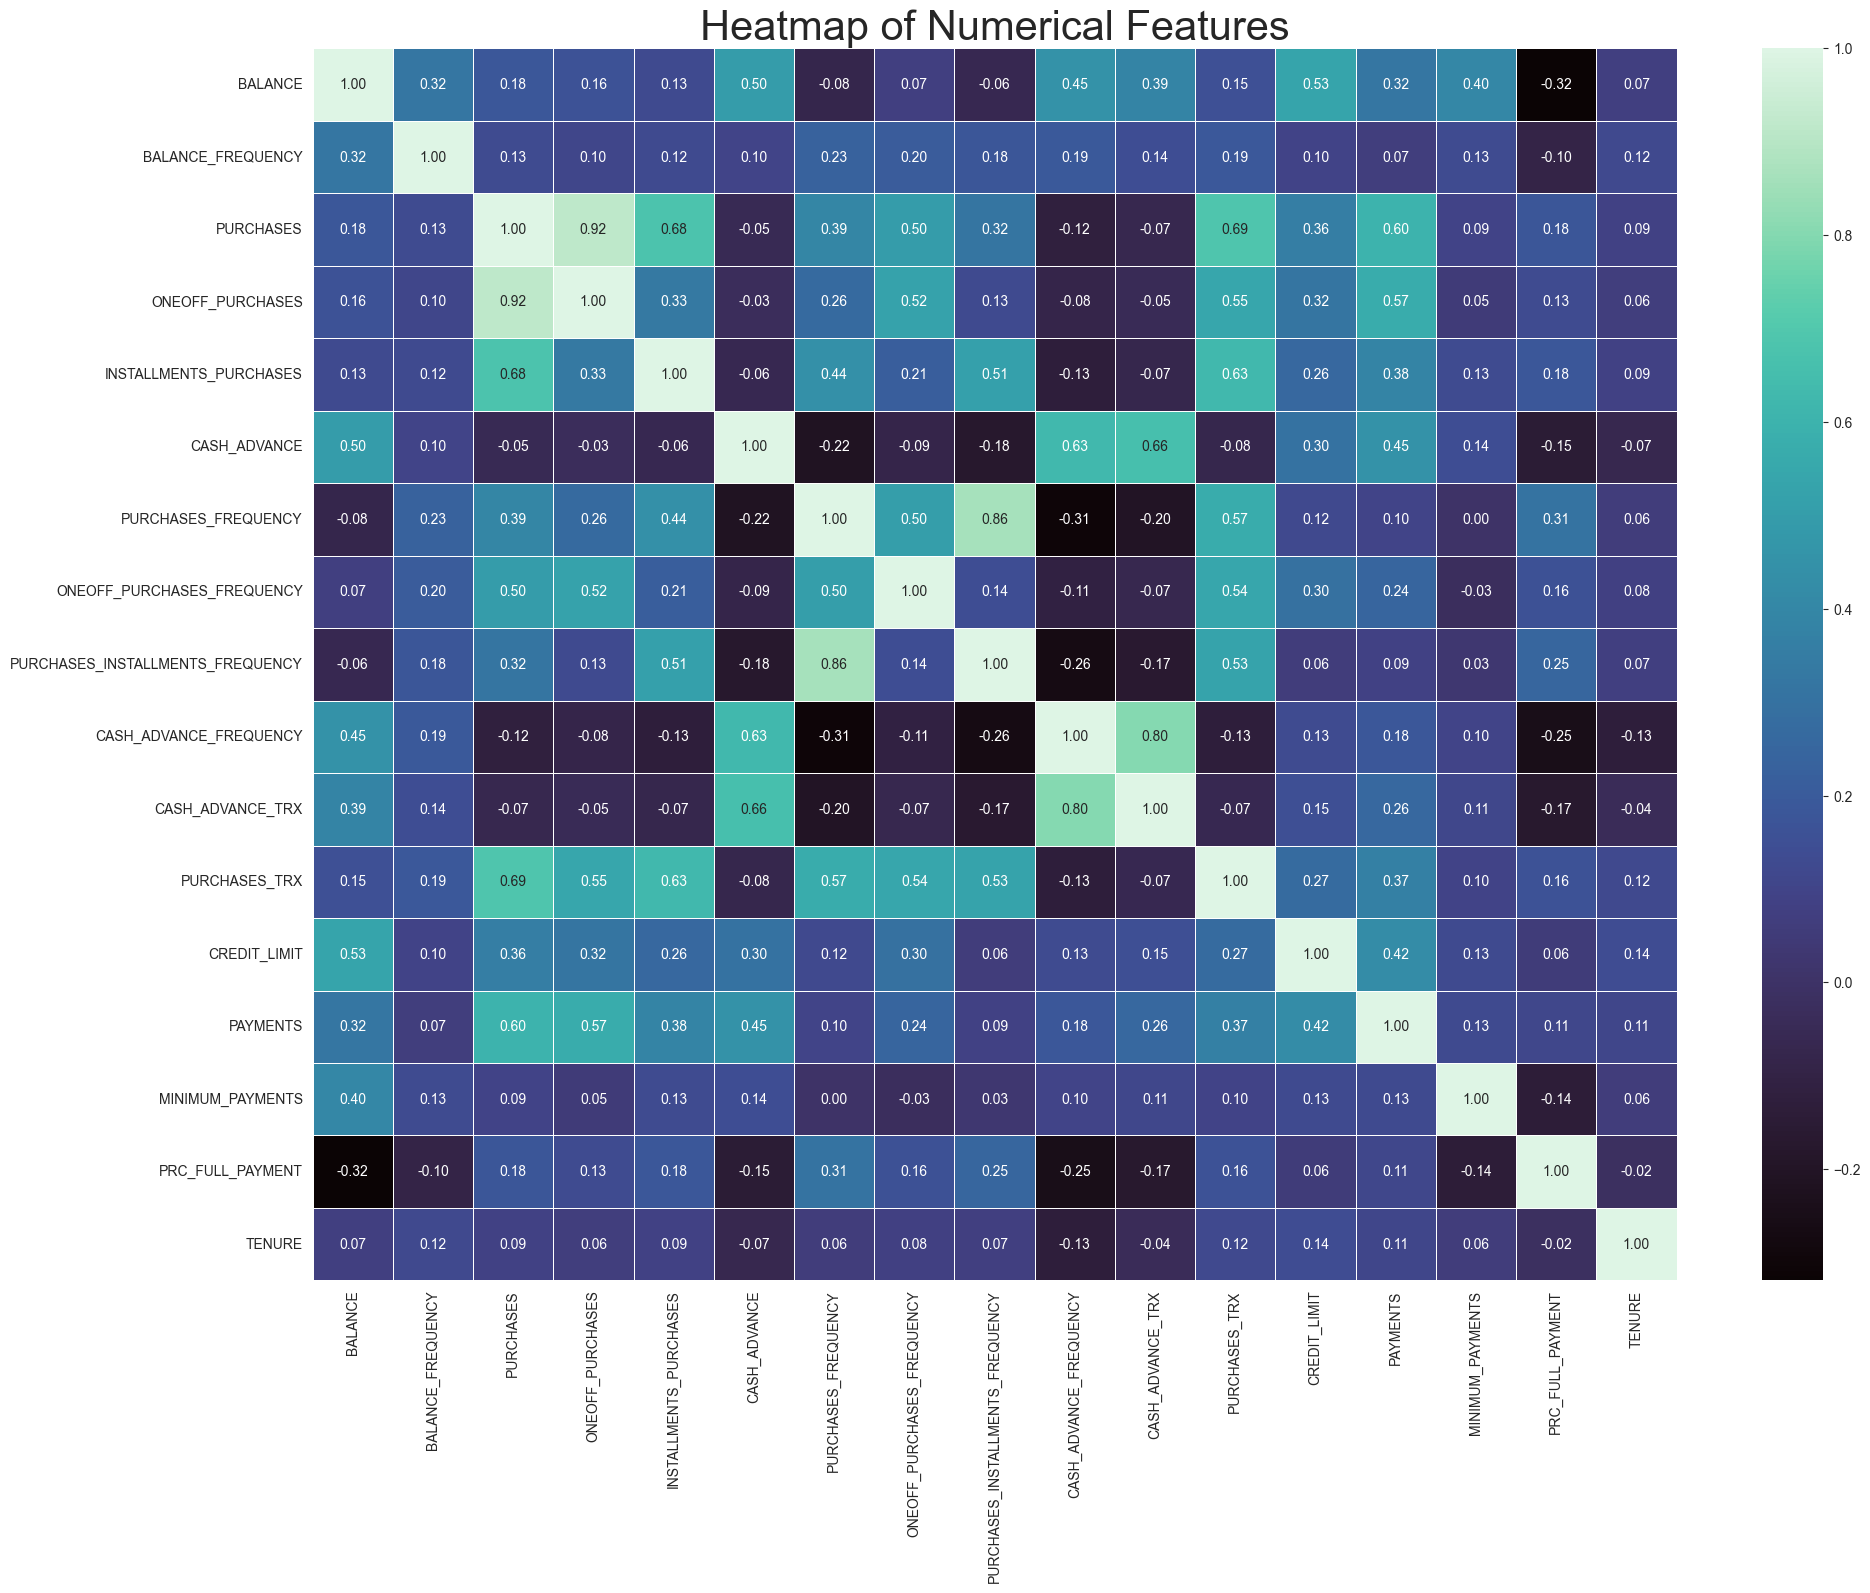

In [32]:
plt.figure(figsize=(22,16))
sns.heatmap(data.corr(), annot=True, fmt='0.2f', linewidths=0.5, cmap='mako')
plt.title("Heatmap of Numerical Features", fontsize=30)
plt.show()

In [33]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [34]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())
data = data.dropna()

In [35]:
data.isna().sum().any()

False

## Outlier Treatment using Z-Score

In [36]:
from scipy.stats import zscore
card_data =  data[(np.abs(zscore(data)) < 3).all(axis=1)]
card_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8876   121.294493           0.750000     385.26            385.26   
8877    55.147722           0.875000     163.31              0.00   
8878   869.328293           0.750000       0.00              0.00   
8879   137.744895           1.000000     441.00              0.00   
8880   331.070135           0.750000      81.20             81.20   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8876                    0.00    169.554775             0.500000   
8877                  163.31      0.000000             0.875000   
8878                    0.00   1153.925205             0.000000   
8879                  441.00      0.000000             0.750000   
8880                    0.00    419.341394             0.125000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8876                    0.500000                          0.000000   
8877                    0.000000                          0.750000   
8878                    0.000000                          0.000000   
8879                    0.000000                          0.625000   
8880                    0.125000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8876                0.125000                 3              7         500.0   
8877                0.000000                 0              7        1000.0   
8878                0.125000                 3              0        1200.0   
8879                0.000000                 0              6        1000.0   
8880                0.250000                 7              1         500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8876    98.225317        113.944625          0.000000       8  
8877    62.619008        109.580539          0.000000       8  
8878   150

## Deal with correlated variables

<Axes: >

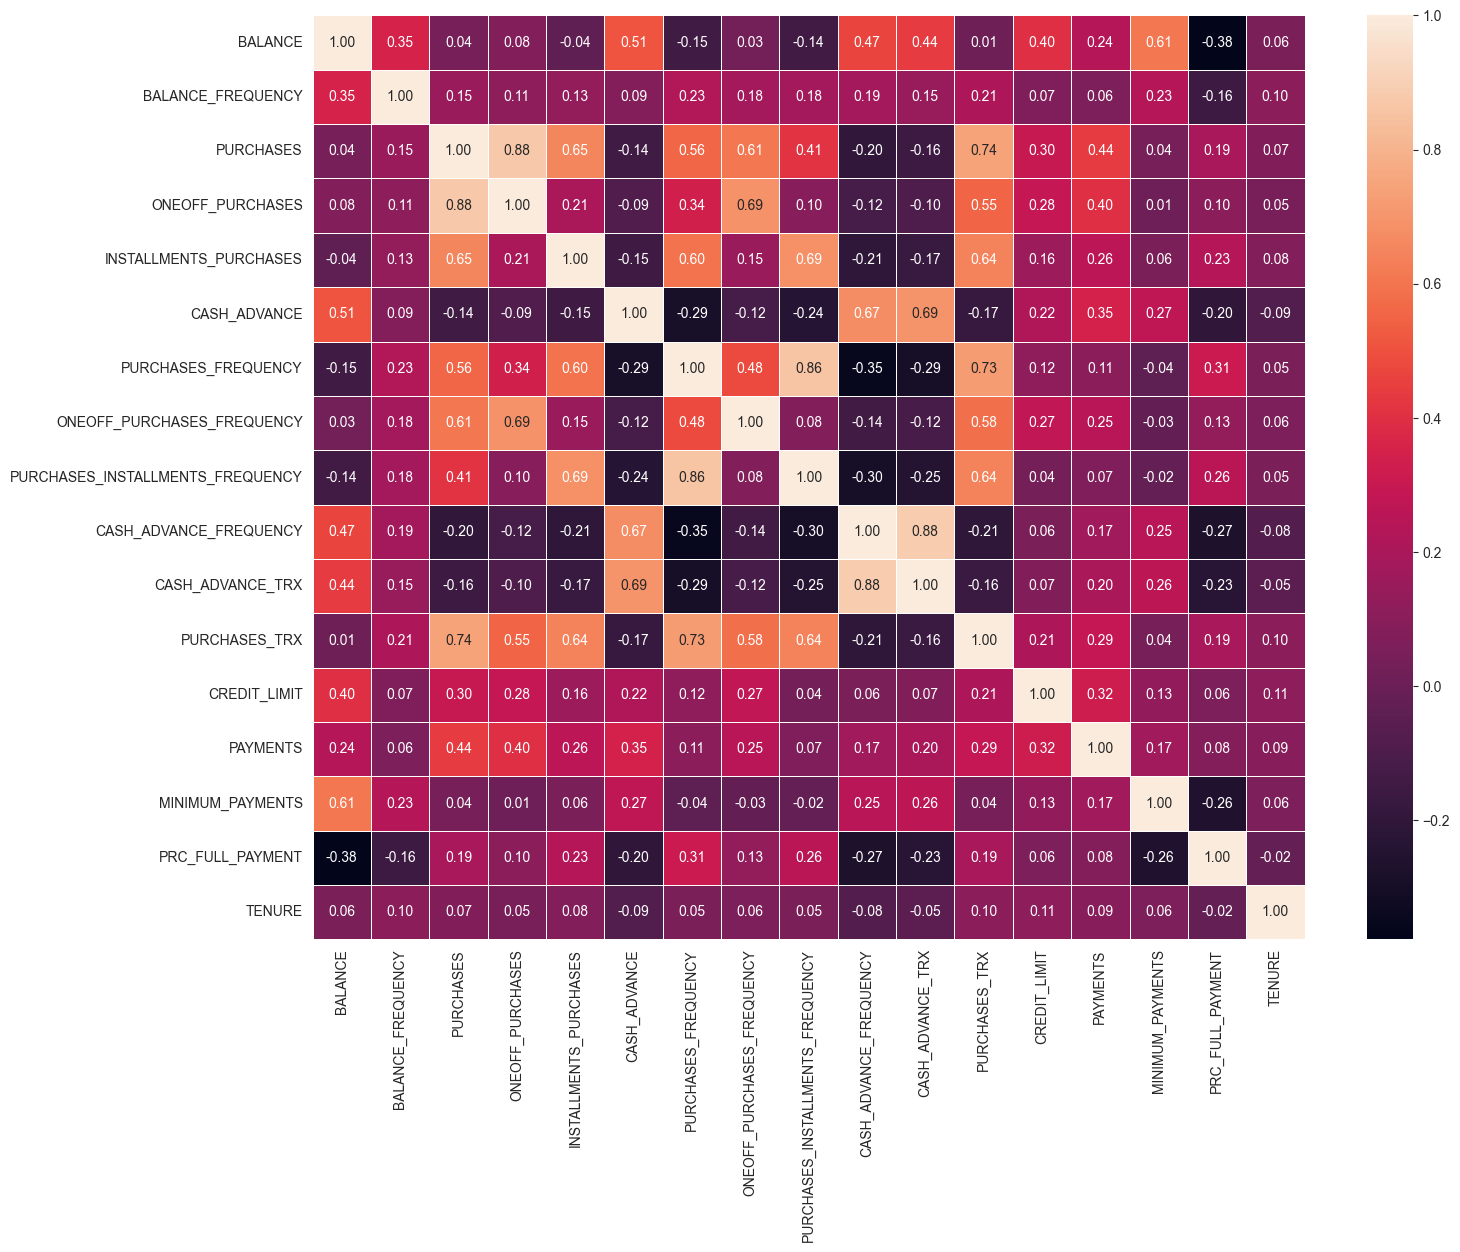

In [37]:
plt.figure(figsize=(16,12))
sns.heatmap(card_data.corr(), annot=True, linewidths=0.5, fmt='0.2f')

We can see high correlation between some columns. Performing PCA will take care of it

## Q3) PCA

In [38]:
sc = StandardScaler()
card_data = sc.fit_transform(card_data)

In [39]:
from sklearn.decomposition import PCA
pca = PCA()
PCA_result = pca.fit_transform(card_data)
np.cumsum(pca.explained_variance_ratio_)

array([0.28968147, 0.49329906, 0.58861536, 0.66564893, 0.7288119 ,
       0.78268169, 0.82938344, 0.86752425, 0.90208756, 0.93039185,
       0.94850925, 0.96579099, 0.97993371, 0.99137675, 0.99772969,
       0.99999802, 1.        ])

We need 12 Principal Components to explain 95% variance

In [40]:
pca_model = PCA(n_components=12, random_state=0)
final_data = pd.DataFrame(pca_model.fit_transform(card_data))
final_data.head()

0         1         2         3         4         5         6   \
0 -1.325625 -2.046626  0.204168 -0.629249  0.063922 -0.321145  0.643574   
1 -2.781074  3.311279  0.444409  1.504716 -1.857740  0.175910 -0.372141   
2  1.237429  0.544760  1.472225 -2.058193  0.490464 -0.017539 -1.688912   
3 -0.606674 -0.007237  1.815941 -1.006197 -0.773933  0.843505  0.180941   
4 -1.448065 -1.469047  0.273819 -1.139256  0.214302 -0.436232  0.309731   

         7         8         9         10        11  
0 -0.205845 -0.274637 -0.125446  0.039036 -0.281492  
1  0.449321 -1.045414  1.490024  1.296720 -1.884472  
2 -0.290765  0.758095  0.996202 -0.779984 -0.451643  
3 -0.717758  0.660198 -1.274210  0.792208  0.590334  
4  0.229897 -0.805582 -0.032215 -0.095327 -0.363798

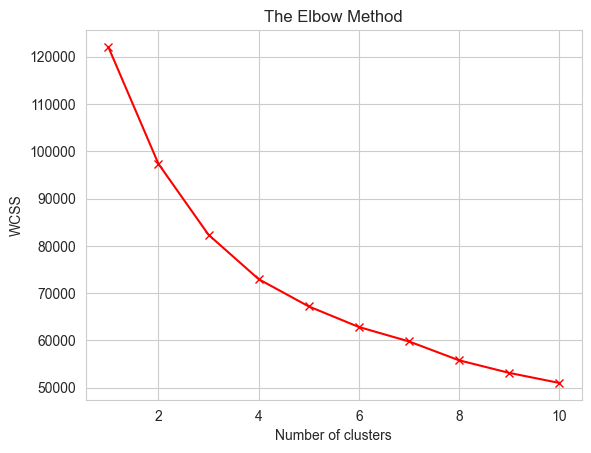

In [41]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(final_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, 'rx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

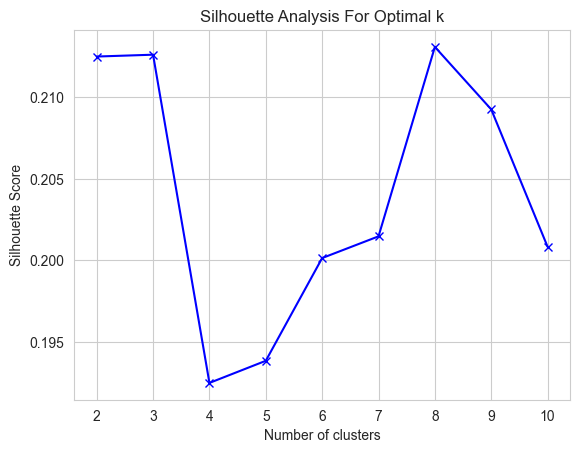

In [42]:
from sklearn.metrics import silhouette_score
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(final_data)
    sil_scores.append(silhouette_score(final_data, kmeans.labels_))
plt.plot(range(2, 11), sil_scores, 'bx-')
plt.title('Silhouette Analysis For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(final_data)

In [44]:
final_data['Cluster'] = clusters

In [45]:
final_data['Cluster'].value_counts()

Cluster
1    4177
2    1791
0    1466
Name: count, dtype: int64

We get 3 clusters.